In [1]:
#Data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

#Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy import stats

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

sns.set()

In [2]:
#import dataframes
df1 = pd.read_csv('one.csv')
df2 = pd.read_csv('benign_csv.csv')

#drop extra first column
df1 = df1.drop(df1.columns[0], axis=1)
df2 = df2.drop(df2.columns[0], axis=1)

#remove the name column (string)
df1 = df1.rename(columns={"Name": "label"})
df2 = df2.drop('Name', axis=1)

In [3]:
df2

,READ_CALENDAR,WRITE_CALENDAR,CAMERA,READ_CONTACTS,WRITE_CONTACTS,GET_ACCOUNTS,ACCESS_FINE_LOCATION,ACCESS_COARSE_LOCATION,RECORD_AUDIO,READ_PHONE_STATE,...,getExternalCacheDir,shareIntent,readPhoneNumber,FileInputStream,getSharedPreferences,telephony,getMessageBody,getDisplayOriginatingAddress,wallpaper,crypto
0,0,0,0,0,0,0,0,0,0,1,...,2,0,0,21,19,10,0,1,0,5
1,0,0,1,1,0,0,1,1,0,1,...,0,0,0,30,11,76,3,0,0,15
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,0,0,0,464,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,19,30,2,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,0,0,0,0,0,0,0,0,0,1,...,4,0,0,30,19,3,0,0,0,24
2064,0,0,0,1,0,0,0,0,0,0,...,6,0,0,118,50,12,0,0,0,24
2065,1,1,1,0,0,1,0,0,1,1,...,3,0,0,54,6,13,0,0,0,79
2066,0,0,1,1,0,0,1,0,0,0,...,10,0,0,233,136,108,0,0,0,218


In [4]:
# Check for duplicated rows
bool_series = df1.duplicated(keep = 'last').sum()
bool_series2 = df2.duplicated().sum()
print("duplicated rows: " + str(bool_series) + " | " + str(bool_series2))

duplicated rows: 143 | 661


In [5]:
# Remove duplicated rows
#df1 = df1.drop_duplicates(keep = 'last')
df2 = df2.drop_duplicates(keep = 'last')
bool_series = df1.duplicated().sum()
bool_series2 = df2.duplicated().sum()
print("duplicated rows:  ransom:" + str(bool_series) + " |  benign: " + str(bool_series2))

duplicated rows:  ransom:143 |  benign: 0


In [6]:
#label the dataframes
df2['label'] = 'Benign'

#shrink benign
df2 = df2.sample(frac=1)
df2 = df2.iloc[0:100]

#join the dataframes into 1 dataframe (df3)
frames = [df1, df2]
df3 = pd.concat(frames)

#shuffle!
df3 = df3.sample(frac=1)
df1 = df1.sample(frac=1)
df2 = df2.sample(frac=1)

C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
df3

,READ_CALENDAR,WRITE_CALENDAR,CAMERA,READ_CONTACTS,WRITE_CONTACTS,GET_ACCOUNTS,ACCESS_FINE_LOCATION,ACCESS_COARSE_LOCATION,RECORD_AUDIO,READ_PHONE_STATE,...,shareIntent,readPhoneNumber,FileInputStream,getSharedPreferences,telephony,getMessageBody,getDisplayOriginatingAddress,wallpaper,crypto,label
57,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,7,jisut
31,0,0,0,0,0,0,0,0,0,0,...,0,0,4,8,4,0,0,0,2,fusob
1949,0,0,1,0,0,0,1,1,0,1,...,0,0,128,84,29,0,0,0,195,Benign
34,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,fusob
100,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,19,jisut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,7,jisut
59,1,1,1,1,1,1,1,1,1,1,...,0,0,0,4,0,0,0,0,0,jisut
171,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,pletor
894,0,0,0,0,0,1,0,0,0,1,...,0,0,124,94,17,0,0,0,99,Benign


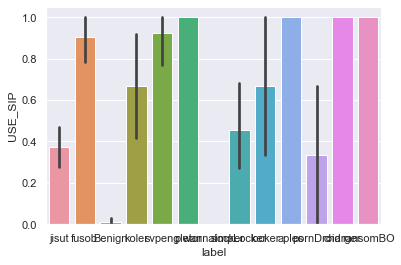

In [8]:
#from numpy import count_nonzero
#estimator=count_nonzero if you want counts, not avg
from numpy import count_nonzero

sns.barplot(y=df3['USE_SIP'], x = df3['label']) #, estimator = count_nonzero)
plt.show()

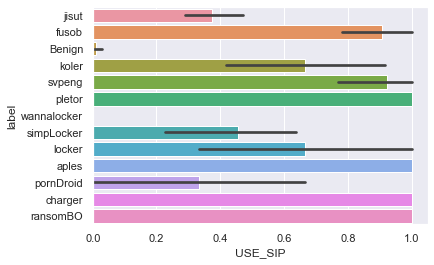

In [9]:
sns.barplot(x = df3['USE_SIP'], y = df3['label'])
plt.show()

In [10]:
#Visualize data
#df2.describe()
df3.describe()

,READ_CALENDAR,WRITE_CALENDAR,CAMERA,READ_CONTACTS,WRITE_CONTACTS,GET_ACCOUNTS,ACCESS_FINE_LOCATION,ACCESS_COARSE_LOCATION,RECORD_AUDIO,READ_PHONE_STATE,...,getExternalCacheDir,shareIntent,readPhoneNumber,FileInputStream,getSharedPreferences,telephony,getMessageBody,getDisplayOriginatingAddress,wallpaper,crypto
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,...,329.000000,329.0,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,0.410334,0.407295,0.474164,0.446809,0.404255,0.468085,0.471125,0.477204,0.422492,0.568389,...,1.492401,0.0,0.003040,24.553191,21.547112,8.723404,0.343465,0.039514,0.358663,98.349544
std,0.492644,0.492079,0.500093,0.497920,0.491495,0.499740,0.499926,0.500241,0.494708,0.496055,...,3.202624,0.0,0.055132,53.771006,55.274192,21.762985,2.052800,0.359905,4.995021,846.511274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,0.000000,18.000000,18.000000,8.000000,0.000000,0.000000,0.000000,20.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,25.000000,0.0,1.000000,337.000000,462.000000,176.000000,23.000000,6.000000,88.000000,10857.000000


In [11]:
# Define Validation method
# Train and validation set split
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# change label to be a category
#df3["label"] = df3["label"].astype('category')

array = df3.values

#All of the non-label columns
X = array[:, 0:-1]

#label column
y = array[:, -1]

#USING CHI2 (current (X_new))
z = SelectKBest(chi2, k=15)
X_new = z.fit_transform(X, y)
X_new.shape

#Obtain the train/validation datasets on a 80/20 split
#TODO same w/ tenfold cross val
# compare results
X_train, X_validation, Y_train, Y_validation = train_test_split(X_new, y, test_size=0.20, random_state=12)

In [12]:
cols = z.get_support(indices=True)
features_df_new = df3.iloc[:,cols]
list(features_df_new.columns)

['setReadable',
 'setWritable',
 'Cipher',
 'execSQL',
 'SQLiteDatabase',
 'openConnection',
 'getFilesDir',
 'getCacheDir',
 'getExternalFilesDir',
 'getExternalCacheDir',
 'FileInputStream',
 'getSharedPreferences',
 'telephony',
 'wallpaper',
 'crypto']

In [13]:
from sklearn.ensemble import VotingClassifier

#Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=12000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto', max_iter=10000)))
models.append(('RF', RandomForestClassifier()))
models.append(('CNN', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 10000)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,


LR: 0.699430 (0.037326)
LDA: 0.494444 (0.060007)
KNN: 0.604274 (0.058874)
CART: 0.737749 (0.038758)
SVM: 0.688319 (0.031877)

C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,



RF: 0.779345 (0.038098)


C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,


CNN: 0.577920 (0.031326)


In [14]:
# Make predictions on validation dataset
model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 10000)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


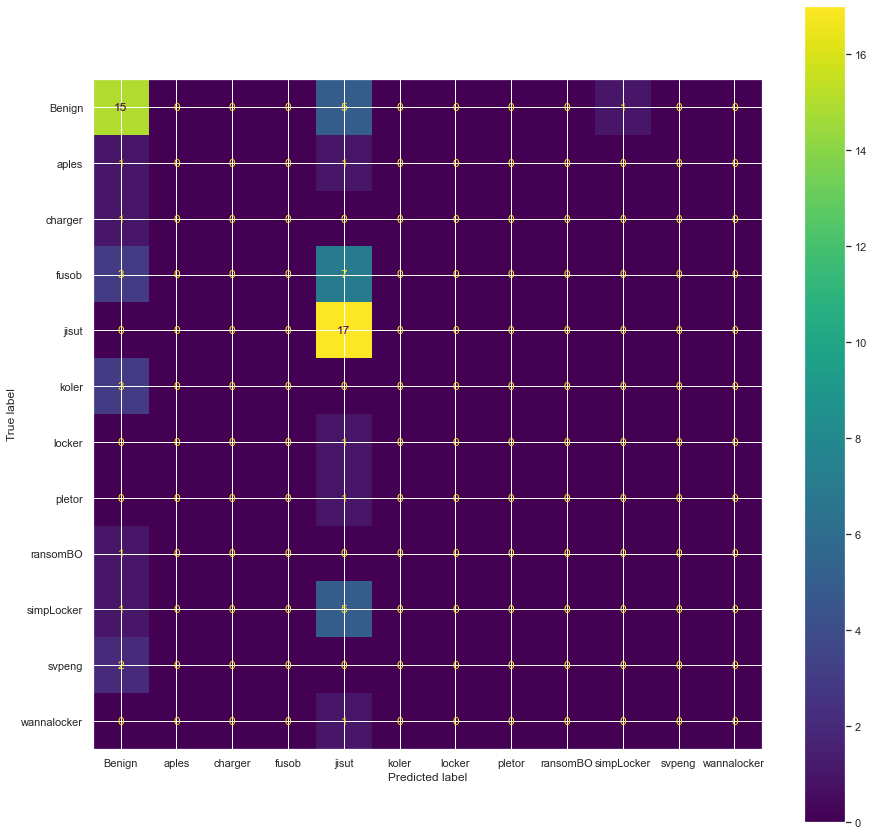

In [15]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(model, X_validation, Y_validation, ax=ax)
plt.show()

In [16]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.48484848484848486
[[15  0  0  0  5  0  0  0  0  1  0  0]
 [ 1  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  7  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  5  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

      Benign       0.56      0.71      0.63        21
       aples       0.00      0.00      0.00         2
     charger       0.00      0.00      0.00         1
       fusob       0.00      0.00      0.00        10
       jisut       0.45      1.00      0.62        17
       koler       0.00      0.00      0.00         3
      locker       0.00      0.00      0.00         1
      pletor       0.00      0.00      0.00         1
    ransomBO       0.00 

C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

In [17]:
# Making an ensamble out of multiple classifiers
clf1 = LogisticRegression(solver='liblinear', multi_class='ovr', dual=False, max_iter=12000)
clf2 = RandomForestClassifier(n_estimators=50, random_state=12)
clf3 = DecisionTreeClassifier()
clf4 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 100000)

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3), ('cnn', clf4)],
                        voting='hard')

# Make predictions on validation dataset
model = eclf
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("Ensamble accuracy: " + str(accuracy_score(Y_validation, predictions)))
print("Matrix: ")
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

# Evaluate classifier on a CV5 cross_val_score
for clf, label in zip(
    [clf1, clf2, clf3, clf4, eclf],
    ['Logistic Regression', 'Random Forest', 'Dec. Tree', 'CNN', 'Ensamble']):
    scores = cross_val_score(clf, X_new, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.5f (+/- %0.5f) [%s]" %
          (scores.mean(), scores.std(), label))

Ensamble accuracy: 0.696969696969697
Matrix: 
[[18  0  0  0  1  1  0  0  0  1  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  7  0  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

      Benign       0.95      0.86      0.90        21
       aples       1.00      1.00      1.00         2
     charger       0.00      0.00      0.00         1
       fusob       1.00      0.30      0.46        10
       jisut       0.52      1.00      0.68        17
       koler       0.67      0.67      0.67         3
      locker       0.00      0.00      0.00         1
      pletor       0.00      0.00      0.00         

C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

Accuracy: 0.76298 (+/- 0.01445) [Random Forest]
Accuracy: 0.73254 (+/- 0.02241) [Dec. Tree]
Accuracy: 0.58671 (+/- 0.02464) [CNN]
Accuracy: 0.74186 (+/- 0.03962) [Ensamble]


In [18]:
#-----------------------------------------------------------------------------------

TODO

[ ] VERY DUPLICATED DATA
[ ] Run analysis per family

[ ] Confusion Matrix
[x] Accuracy
[x] Precision/Recall
[ ] Macro / W. Average

[x] Add barchart comparisons of features
[x] Feature Engineering / Selection

Plot for permissions (top best ones)
Compare to papers: 
    table with # of features
